# Step 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_SNP = pd.read_csv("matrix_1kg.txt", sep = "\t")
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
alt_all_sum = df_SNP.iloc[:,5:].sum(axis=0)
num_chrom = (2*len(df_SNP.index))
alt_all_freq = alt_all_sum/num_chrom

alt_all_freq

HG00097    0.03165
HG00099    0.03085
HG00100    0.03120
HG00101    0.03190
HG00102    0.03015
            ...   
NA21137    0.03245
NA21141    0.03225
NA21142    0.03085
NA21143    0.02995
NA21144    0.03400
Length: 2547, dtype: float64

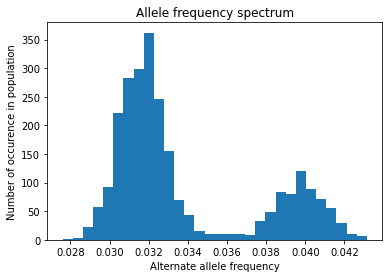

In [13]:
fig, ax = plt.subplots()
ax.hist(alt_all_freq, bins = 30)

ax.set_title("Allele frequency spectrum")
ax.set_xlabel("Alternate allele frequency")
ax.set_ylabel("Number of occurence in population")

plt.show()